In [1]:
import cPickle as pkl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    if xlog:
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    if ylog:
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       #c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       #edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][2:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][2:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

    ax.set_rasterization_zorder(1)

    plt.savefig(filename, bbox_inches='tight', dpi=200)

Transcripts:

In [4]:
transcriptome_plotkin = pkl.load((open('../../parameters/transcriptome_plotkin.p')))

In [5]:
pd.Series(transcriptome_plotkin).describe()

count    4839.000000
mean       12.399256
std        45.559384
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      1283.000000
dtype: float64

Initiation rates:

In [6]:
init_rates = pkl.load((open('../../parameters/init_rates_plotkin.p')))

In [7]:
pd.Series(init_rates).describe()

count    4.839000e+03
mean     1.567727e-06
std      1.128263e-06
min      9.375766e-10
25%      8.320521e-07
50%      1.291872e-06
75%      1.962904e-06
max      1.440641e-05
dtype: float64

In [8]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [9]:
orf_lengths = {prot: len(orf_genomic_dict[prot]) for prot in orf_genomic_dict}

4839


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


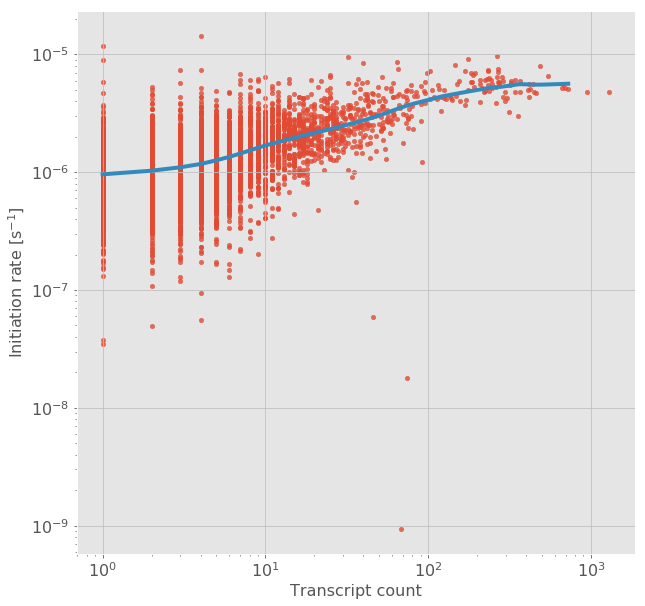

In [10]:
scatter_dicts(transcriptome_plotkin, init_rates, xaxislabel='Transcript count', 
              yaxislabel='Initiation rate [s$^{-1}$]', fontsize=16, markersize=20,
              alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True)

4716


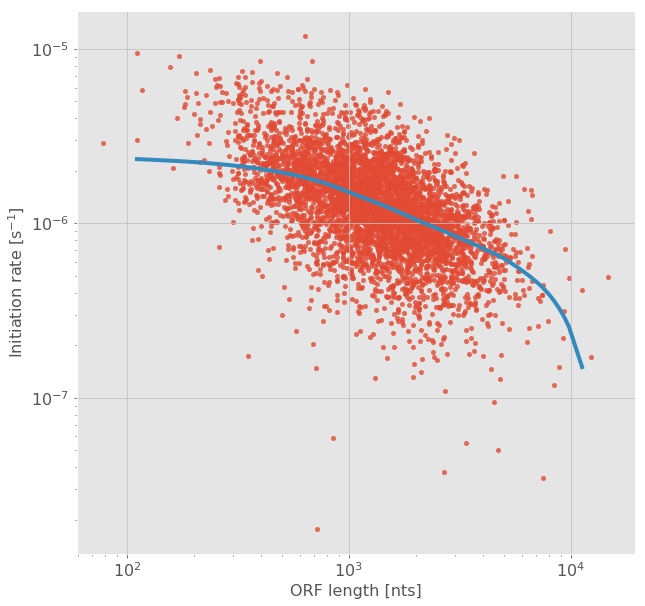

In [11]:
scatter_dicts(orf_lengths, init_rates, xaxislabel='ORF length [nts]', 
              yaxislabel='Initiation rate [s$^{-1}$]', fontsize=16, markersize=20,
              alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True)

In [15]:
expected_initiations_per_second = {gene: init_rates[gene] * transcriptome_plotkin[gene] for gene in init_rates}

In [16]:
sum(expected_initiations_per_second.values())

0.21047256610692186

4716


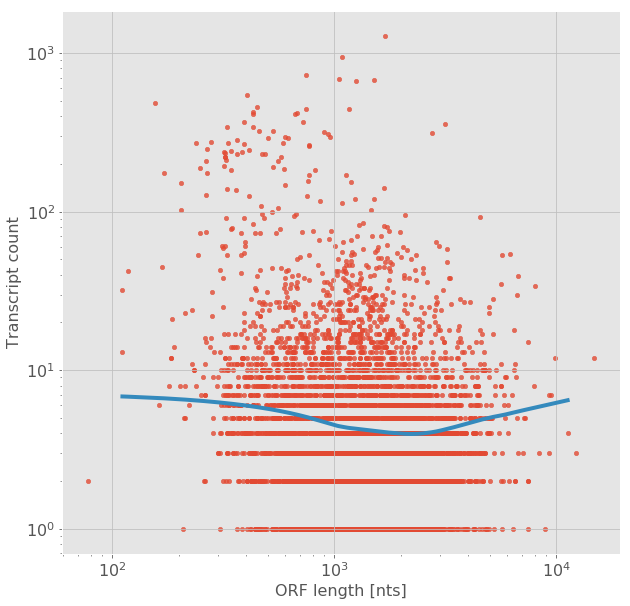

In [20]:
scatter_dicts(orf_lengths, transcriptome_plotkin, xaxislabel='ORF length [nts]', 
              yaxislabel='Transcript count', fontsize=16, markersize=20,
              alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True)